# Steps

- Training:
    - Initialize weight to zero
    - Initialize bias to zero
- Given a data point:
    - Predict result by using y_hat = wx+b
    - Calculate error
    - Use gradient descent to figure out new weight and bias values
    - Repeat n times

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import datasets

In [2]:
class LinearRegression:
    def __init__(self, lr=0.001, n_iters=1000):
        self.lr = lr
        self.n_iters = n_iters
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0

        for _ in range(self.n_iters):
            y_pred = np.dot(X, self.weights) + self.bias

            dw = (1/n_samples) * np.dot(X.T, (y_pred - y))
            db = (1/n_samples) * np.sum(y_pred - y)

            self.weights = self.weights - self.lr * dw
            self.bias = self.bias - self.lr * db

    def predict(self, X):
        y_pred = np.dot(X, self.weights) + self.bias
        return y_pred

In [3]:
X, y = datasets.make_regression(n_samples=100, n_features=1, noise=20, random_state=43)

In [4]:
X[:5]

array([[ 2.23035965],
       [ 1.22121596],
       [-1.29916134],
       [-1.0776009 ],
       [-1.08639929]])

In [5]:
y[:5]

array([ 68.22308758,  42.40733639, -56.90877596, -52.6647486 ,
       -64.64511209])

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=43)

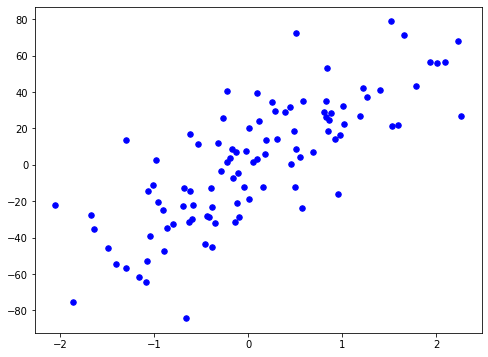

In [7]:
fig = plt.figure(figsize=(8,6))
plt.scatter(X[:, 0], y, color='b', marker='o', s=30)
plt.show()

In [8]:
reg = LinearRegression(lr=0.01)
reg.fit(X_train,y_train)
y_pred = reg.predict(X_test)

In [9]:
def mse(y_test, predictions):
    return np.mean((y_test-predictions)**2)

In [10]:
mse = mse(y_test, y_pred)
mse

385.9243637104448

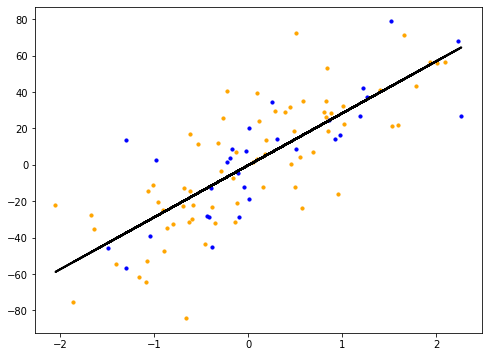

In [11]:
y_pred_line = reg.predict(X)

fig = plt.figure(figsize=(8,6))
m1 = plt.scatter(X_train, y_train, color='orange', s=10)
m2 = plt.scatter(X_test, y_test, color='blue', s=10)
plt.plot(X, y_pred_line, color='black', linewidth=2)
plt.show()